# Support Vector Regression (SVR)

## Importing the libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [44]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [45]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [46]:

y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scX=StandardScaler()
X = scX.fit_transform(X)

scY=StandardScaler()
y = scY.fit_transform(y)

In [48]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [49]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


## Training the SVR model on the whole dataset

In [50]:
from sklearn.svm import SVR
svr_ob = SVR(kernel='rbf')
svr_ob.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [58]:
scY.inverse_transform(svr_ob.predict(scX.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

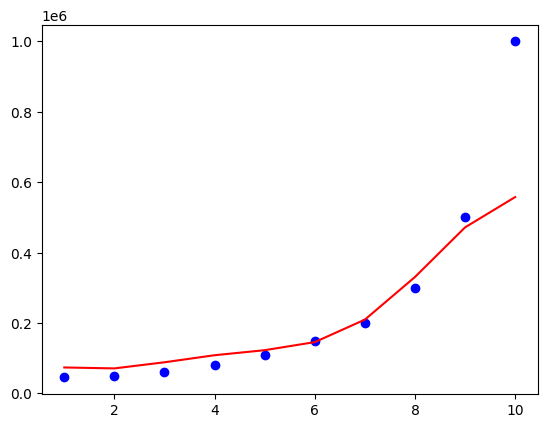

In [66]:
plt.scatter(scX.inverse_transform(X),scY.inverse_transform(y),color='blue')
plt.plot(scX.inverse_transform(X),scY.inverse_transform(svr_ob.predict(X).reshape(-1,1)),color='red')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-74-8acaeba07e6a>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(scX.inverse_transform(X)), max(scX.inverse_transform(X)), 0.5)


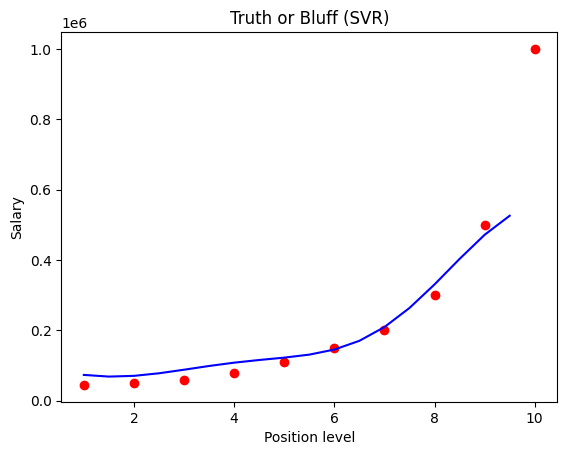

In [74]:
X_grid = np.arange(min(scX.inverse_transform(X)), max(scX.inverse_transform(X)), 0.5)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scX.inverse_transform(X), scY.inverse_transform(y), color = 'red')
plt.plot(X_grid, scY.inverse_transform(svr_ob.predict(scX.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()